# Visualizing the LHC Output

In [3]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import cftime
import cf_xarray

## Read processed data

### Global sum monthly NBP

In [4]:
NBP_sum = xr.open_dataarray('./processed_data/nbp_globalsum_1850-2014.nc')

In [5]:
NBP_sum

<xarray.DataArray (ens: 501, time: 1980)>
[991980 values with dtype=float64]
Coordinates:
  * time     (time) object 1850-01-01 00:00:00 ... 2014-12-01 00:00:00
  * ens      (ens) object 'LHC0000' 'LHC0001' 'LHC0002' ... 'LHC0499' 'LHC0500'
Attributes:
    units:    PgC/yr

### Calculate cumulative annual mean NBP

In [8]:
def amean(da,cf=1):
    #annual mean
    m  = da['time.daysinmonth']
    xa = cf/365*(m*da).groupby('time.year').sum().compute()
    return xa

In [12]:
nbp_cumulative = amean(NBP_sum).cumsum(dim='year')
nbp_cumulative

<xarray.DataArray (year: 165, ens: 501)>
array([[ 1.68739521e-01, -1.62914889e-01, -3.38453236e-01, ...,
        -1.17339674e+00,  5.19225150e-02,  8.01718489e-01],
       [-1.28441739e+00, -1.99476519e+00, -4.10038801e+00, ...,
        -3.54550833e+00, -1.43642397e+00, -7.76674820e-01],
       [-2.04247517e+00, -2.57294972e+00, -6.15613970e+00, ...,
        -4.59798492e+00, -2.48487641e+00, -1.75917018e+00],
       ...,
       [-1.14763241e+01, -2.58823542e+01, -7.74044148e+01, ...,
        -3.08231463e+00, -7.06449627e+01, -2.52048979e+01],
       [-8.94355309e+00, -2.39343826e+01, -7.60883496e+01, ...,
        -5.53112599e-01, -6.92932686e+01, -2.27858893e+01],
       [-5.76027244e+00, -2.07711980e+01, -7.45246519e+01, ...,
         2.64020321e+00, -6.80494321e+01, -2.02816915e+01]])
Coordinates:
  * ens      (ens) object 'LHC0000' 'LHC0001' 'LHC0002' ... 'LHC0499' 'LHC0500'
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014

## NBP plot

In [14]:
nyrs = len(nbp_cumulative.year)
nyrs

165

In [22]:
minyr = nbp_cumulative.year.min().values
minyr

array(1850)

In [24]:
maxyr = nbp_cumulative.year.max().values
maxyr

array(2014)

In [39]:
# you can slice ensemble members!
nbp_am_cumulative.sel(ens=slice('LHC0001','LHC0500'))

<xarray.DataArray (year: 165, ens: 500)>
array([[ 3.30826963e-01,  2.89898325e-01,  4.08660735e-01, ...,
        -9.58377673e-02,  6.03887787e-01,  8.75482387e-01],
       [-3.72823322e-01, -1.47779161e+00, -1.86045250e+00, ...,
        -1.92891665e+00, -2.05572627e-02,  7.96309665e-01],
       [-1.92758682e+00, -5.05293164e+00, -5.51989102e+00, ...,
        -3.80781066e+00, -1.58641427e+00, -9.71544557e-01],
       ...,
       [-3.18638857e+01, -8.11788319e+01, -9.05202833e+01, ...,
        -6.81954895e+00, -7.25025671e+01, -2.84173926e+01],
       [-3.05106629e+01, -8.02248293e+01, -8.97325136e+01, ...,
        -5.20472456e+00, -7.13826299e+01, -2.65693155e+01],
       [-2.79418795e+01, -7.87288323e+01, -8.75755147e+01, ...,
        -2.45892418e+00, -7.00330010e+01, -2.40976542e+01]])
Coordinates:
  * ens      (ens) object 'LHC0001' 'LHC0002' 'LHC0003' ... 'LHC0499' 'LHC0500'
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014

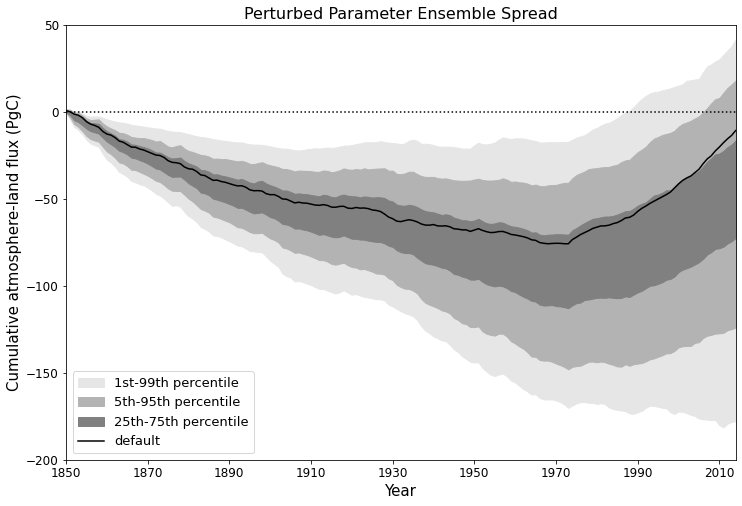

In [41]:
fig = plt.figure(figsize=(12,8))

t=minyr+np.arange(nyrs)

qs=[1,5,25]
cs=[0.9,0.7,0.5]
labels=['1st-99th percentile', '5th-95th percentile', '25th-75th percentile']

for i,q in enumerate(qs):
    q1 = nbp_am_cumulative.sel(ens=slice('LHC0001','LHC0500')).quantile(q/100,dim='ens')
    q2 = nbp_am_cumulative.sel(ens=slice('LHC0001','LHC0500')).quantile(1-q/100,dim='ens')
    plt.fill_between(t,q1,q2,color=cs[i]*np.ones(3),label=labels[i])
    
plt.plot(t, nbp_am_cumulative.sel(ens='LHC0000'), color='k', zorder=2, label='default')
plt.xlim([minyr,maxyr])
plt.ylim([-200,50])
plt.legend(loc=3, fontsize=13)
plt.axhline(y=0, color='k', linestyle=':')
plt.xlabel('Year', fontsize=15)
plt.xticks(minyr+20*np.arange(9), fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Cumulative atmosphere-land flux (PgC)', fontsize=15)
plt.title('Perturbed Parameter Ensemble Spread', fontsize=16);
#plt.savefig('../figs/lhc/NBP_cumulative_percentiles.png', bbox_inches='tight', dpi=300)